In [1]:
import scipy.linalg as la
from math_functions.Get_state_index import Get_State_index
from main_grape.Grape import Grape
from main_grape.Evolve import Evolve
%pylab inline
import random as rd
import time
from IPython import display
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
def hamming_distance(x):
    tot = 0
    while x:
        tot += 1
        x &= x - 1
    return tot

def Hadamard (N=1):
    
    Had = (2.0 ** (-N / 2.0)) * np.array([[((-1) ** hamming_distance(i & j))
                                      for i in range(2 ** N)]
                                     for j in range(2 ** N)])
    return Had

#Defining time scales
total_time = 10.0
steps = 300

#Defining H0
qubit_state_num = 2

Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)

H0 = Q_z 
       

#Defining Forbidden sates

#states_forbidden_list = [3]

#Defining Concerned states (starting states)
psi0 = [0,1]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1]
states_draw_names = ['0','1']

#Defining U (Target)

U = np.reshape(Hadamard(1),[2,2])


#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num)
U0= q_identity

#Defining control Hs
XI = Q_x
ZI = Q_z
Hops = [XI]
ops_max_amp = [4.0]
Hnames =['x']

#Defining convergence parameters
max_iterations = 1000
decay = max_iterations/2
convergence = {'rate':0.05, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-10,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0, 'z':0, 'dwdt':0,'d2wdt2':0, 'inter':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

    #Defining initial pulses
u0 = []
u0.append(np.ones(steps))




L-BFGS-B optimization done


(array([[  2.17249513e-01,   2.40144476e-01,   1.91156134e-01,
           1.85260162e-01,   2.12716818e-01,   1.95229426e-01,
           1.86404794e-01,   1.92516223e-01,   1.64680272e-01,
           1.40065089e-01,   1.51733994e-01,   1.48917347e-01,
           1.78217366e-01,   8.82231295e-02,   1.48439750e-01,
           9.52503085e-02,   1.37122676e-01,   5.58821633e-02,
           9.96650234e-02,   7.32917860e-02,   3.43700983e-02,
           5.95072806e-02,   6.58217669e-02,   4.24246453e-02,
           8.33756942e-03,   2.67591160e-02,  -3.67282168e-03,
          -2.47458287e-04,   6.92724995e-03,  -1.29324254e-02,
           2.47078785e-03,  -1.29155852e-02,  -4.82962728e-02,
          -2.93650813e-02,  -5.65454960e-02,  -7.70033672e-02,
          -7.22659901e-02,  -9.53286514e-02,  -4.70137671e-02,
          -9.34784934e-02,  -1.07197948e-01,  -1.06128424e-01,
          -1.13668643e-01,  -1.16876617e-01,  -1.40329629e-01,
          -1.34571463e-01,  -1.76931143e-01,  -1.644661

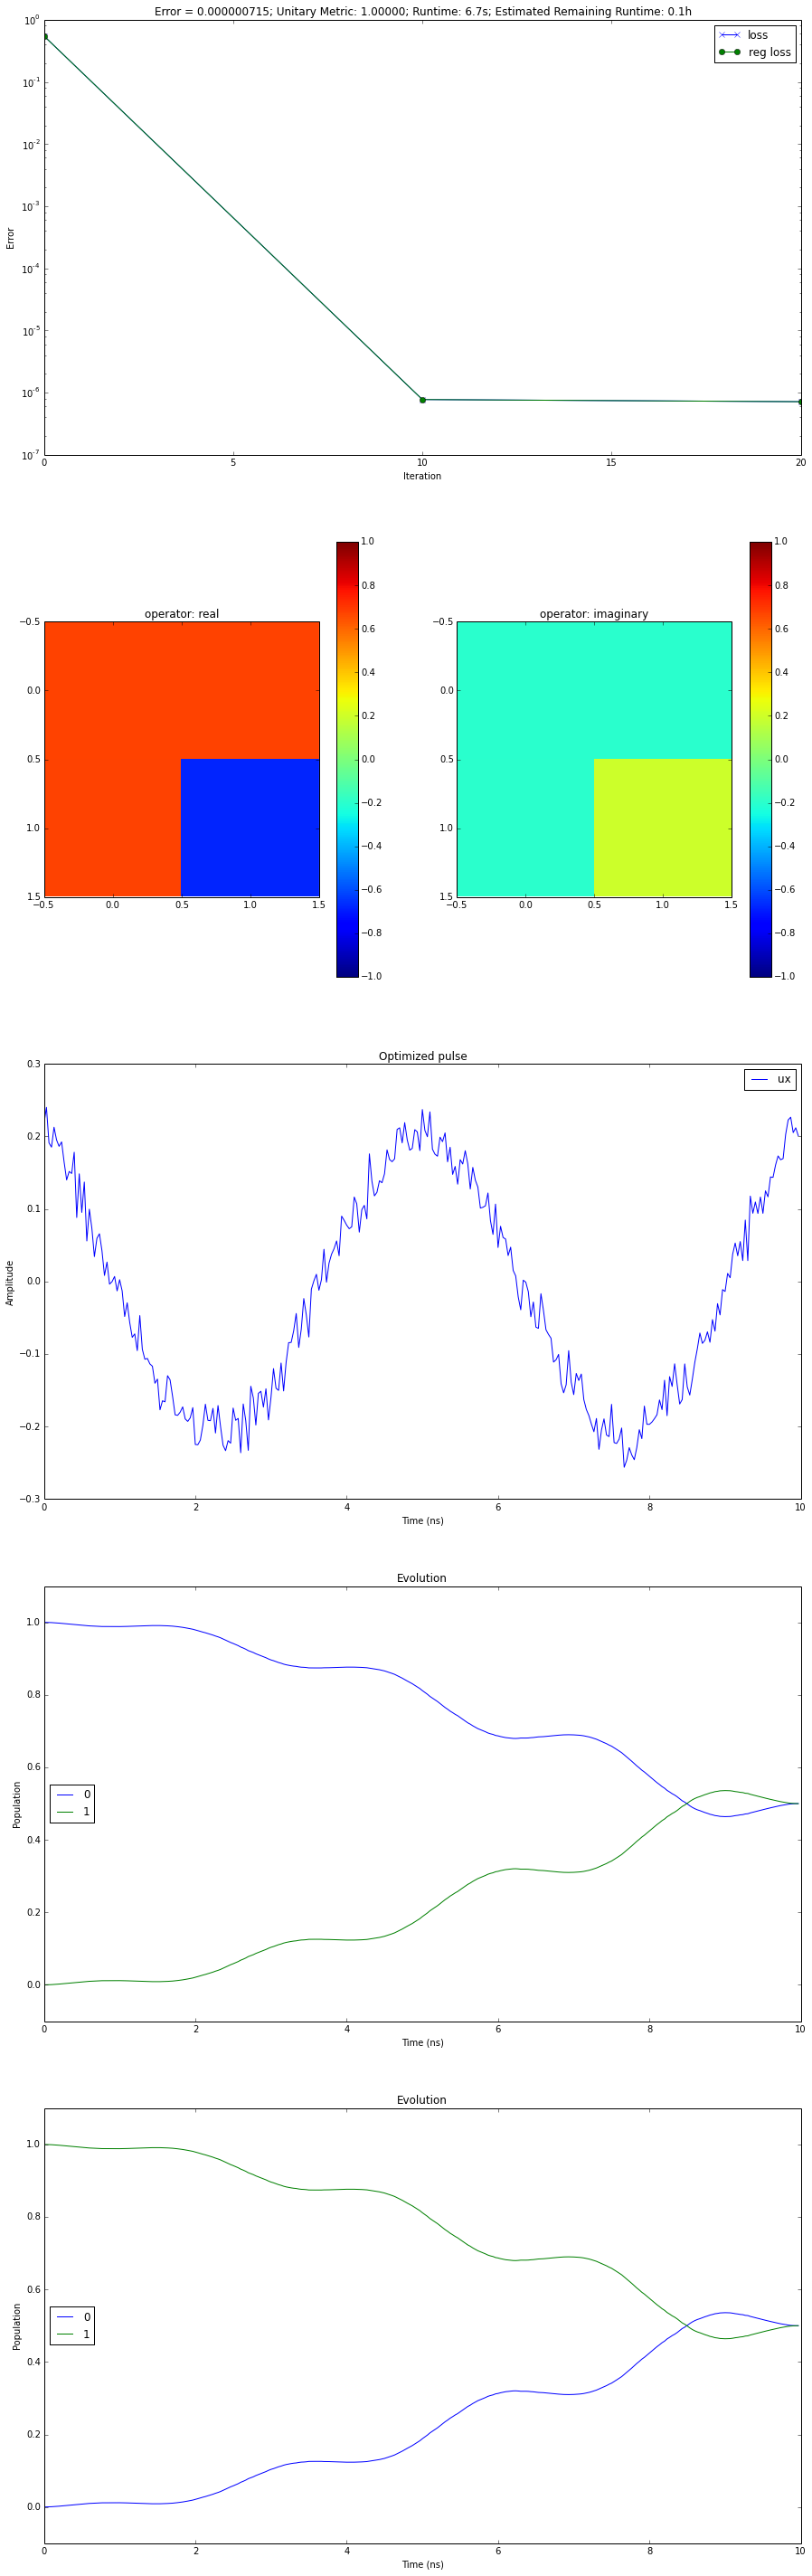

In [3]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence,method = 'L-BFGS-B', switch = False, draw = [states_draw_list,states_draw_names], reg_coeffs = reg_coeffs)

Error = 0.903375149


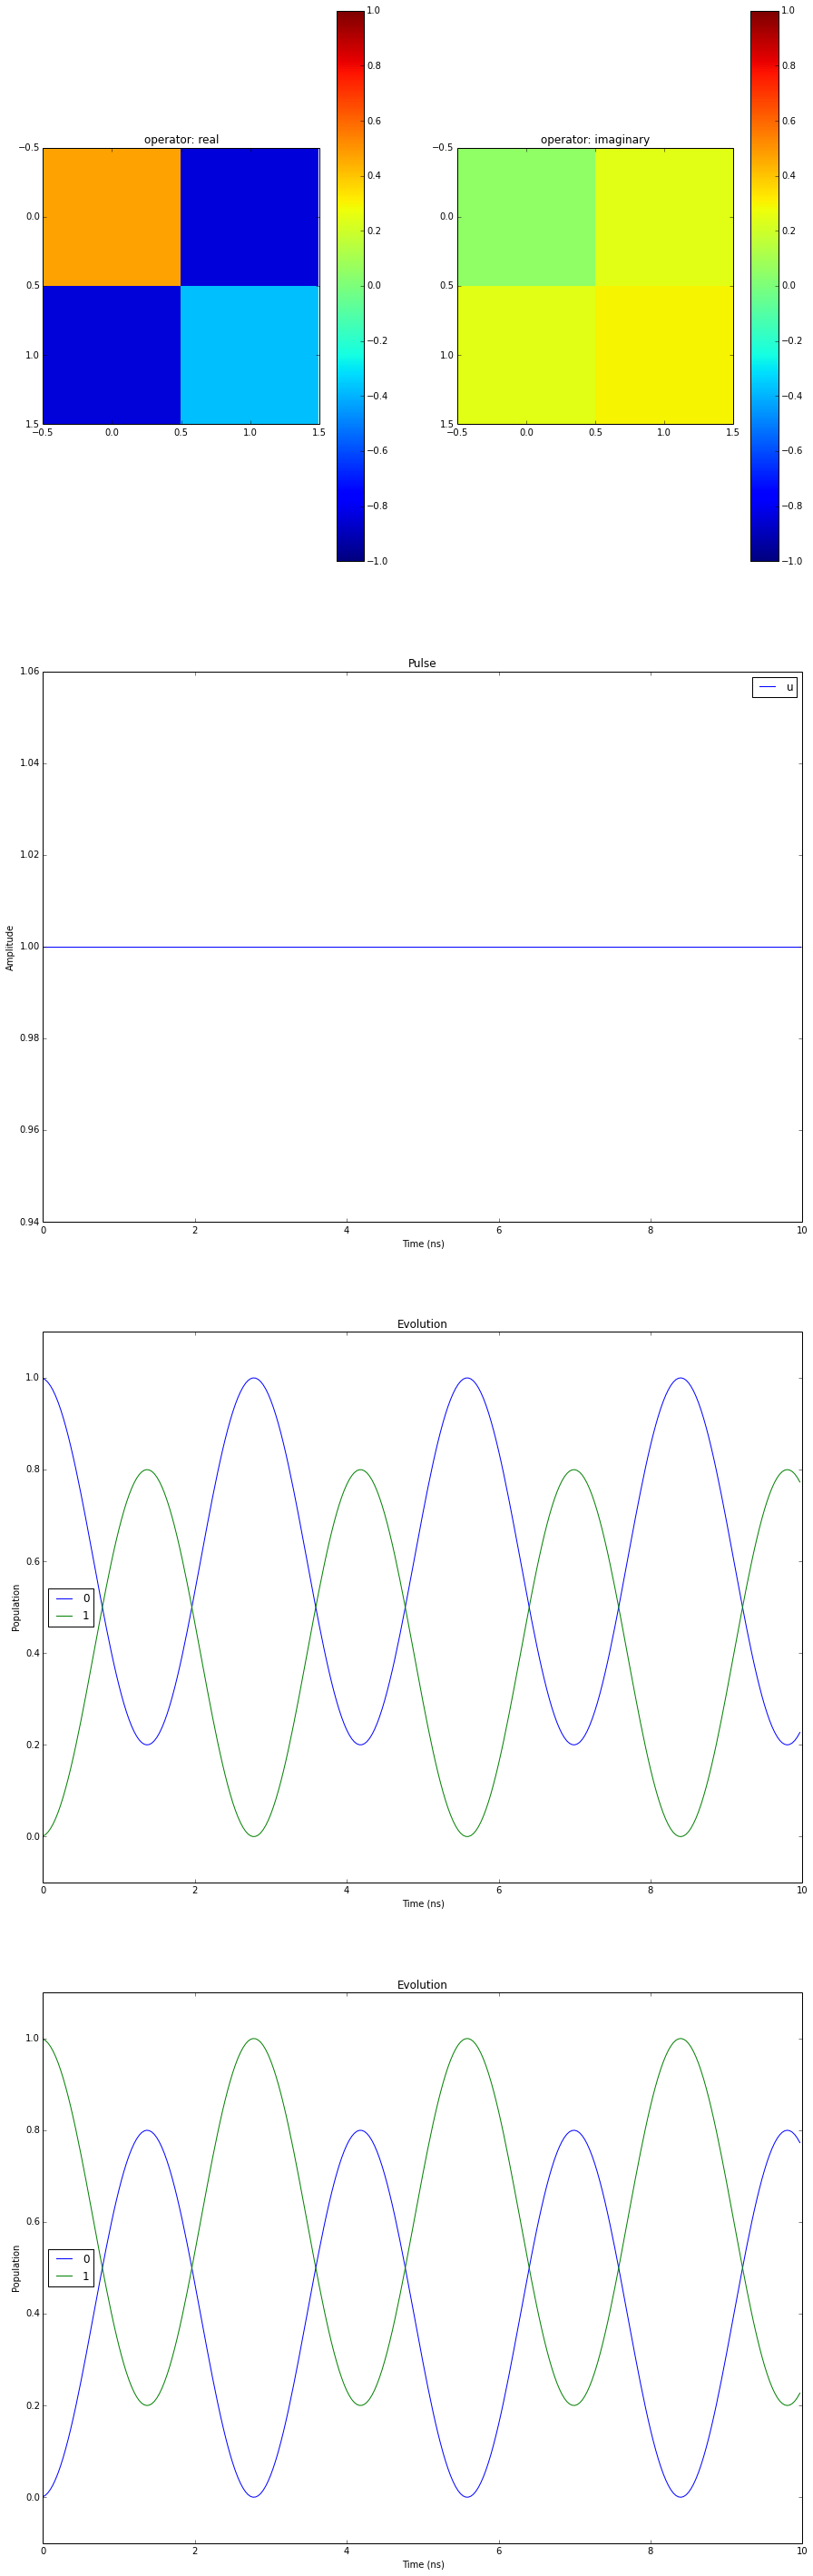

In [4]:
Evolve(H0,Hops,U0,total_time,steps,psi0, u0, draw = [states_draw_list,states_draw_names], U = U)